***Master in Biomedical Data Science (MBDS)***

***Medical Imaging***

Professor: Roser Sala Llonch

Course 2023-2024


---



# P3. Functional MRI

In sthis practical session, we will see different types of functional MRI data and how to analyse them

In [ ]:
# Install nilearn
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 30.2 MB/s eta 0:00:00


##1. The Haxby dataset
A study of visual object category identification. It has been widely used in cognitive neuroscience and for brain decoding.
The original paper can be found [HERE](https://www.science.org/doi/10.1126/science.1063736)



###1.1. Show stimuli
Visualize the set of stimuli used in the task. This is not related to the fMRI data, but it's a good visualization practice.


Dataset created in /root/nilearn_data/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/5cd78c74b711572c7f41a5bddb69abca/stimuli-2010.01.14.tar.gz..... done.


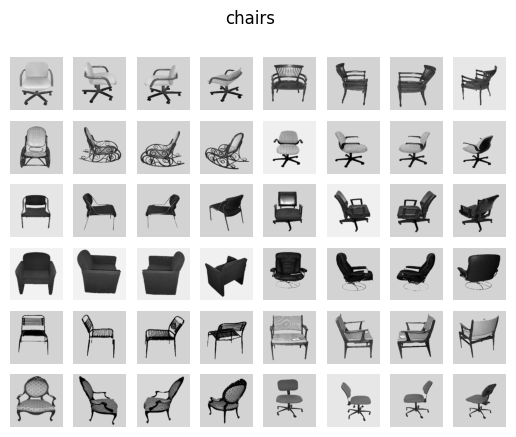

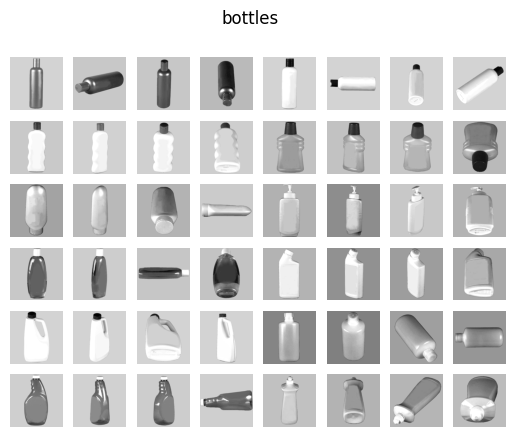

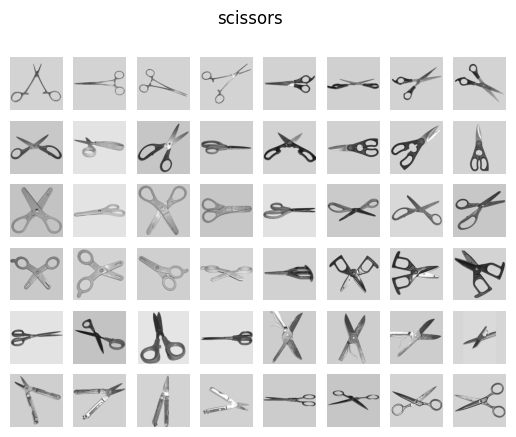

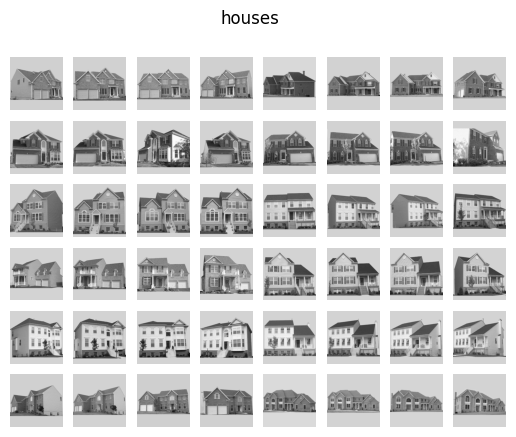

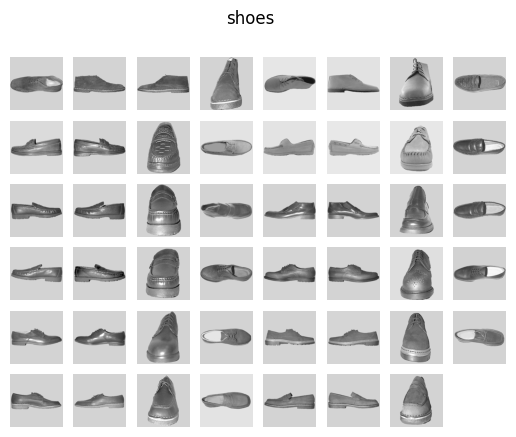

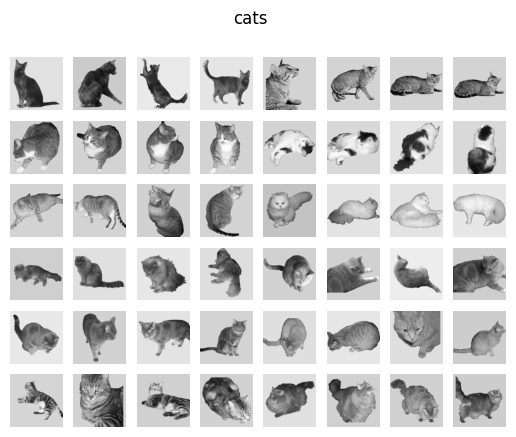

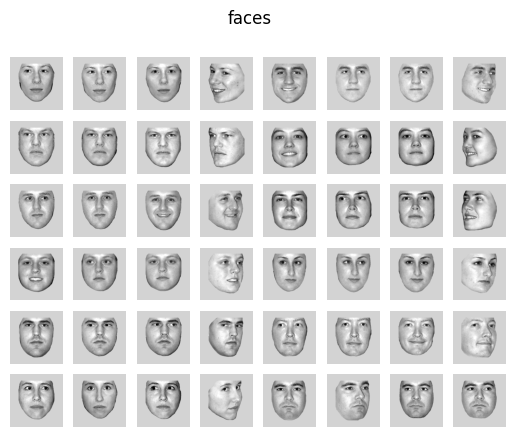

In [ ]:
import matplotlib.pyplot as plt

from nilearn import datasets
from nilearn.plotting import show

haxby_dataset = datasets.fetch_haxby(subjects=[], fetch_stimuli=True)
stimulus_information = haxby_dataset.stimuli

for stim_type in stimulus_information:
    # skip control images, there are too many
    if stim_type != 'controls':

        file_names = stimulus_information[stim_type]

        fig, axes = plt.subplots(6, 8)
        fig.suptitle(stim_type)

        for img_path, ax in zip(file_names, axes.ravel()):
            ax.imshow(plt.imread(img_path), cmap=plt.cm.gray)

        for ax in axes.ravel():
            ax.axis("off")

show()

**Exercise 1.1.** Take a look at the paper and explain with your words how are these images used in the context of fMRI

 The paper explores the functional architecture of the object vision pathway in the human brain, particularly focusing on the ventral temporal cortex. This study uses functional magnetic resonance imaging (fMRI) to analyze how this part of the brain responds to different categories of visual stimuli, such as faces, cats, and various man-made objects as we can see in the pictures above. Therefore, images are used as the visual stimuli.

###1.2. Fetch the dataset


Dowload the dataset from nilearn:

In [ ]:
import numpy as np # always good to have numpy and pandas in your environment
import pandas as pd
from nilearn import datasets

# fetch the data (by default, 2nd subject will be fetched, check the documentation if you want to change the subject)
haxby_dataset = datasets.fetch_haxby()

Downloaded 281665536 of 291168628 bytes (96.7%,    0.2s remaining) ...done. (5 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/def37a305edfda829916fa14c9ea08f8/subj2-2010.01.14.tar.gz..... done.


**Exercise 1.2.1** Examine the data that you've just downloaded. Try to identify the different elements in the dataset (don't worry, just make a guess)

In [ ]:
# place your code (if you need any) here

haxby_dataset.keys()  #The data is similar to a dictionary

dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description'])

In [ ]:
haxby_dataset

{'anat': ['/root/nilearn_data/haxby2001/subj2/anat.nii.gz'],
 'func': ['/root/nilearn_data/haxby2001/subj2/bold.nii.gz'],
 'session_target': ['/root/nilearn_data/haxby2001/subj2/labels.txt'],
 'mask_vt': ['/root/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz'],
 'mask_face': ['/root/nilearn_data/haxby2001/subj2/mask8b_face_vt.nii.gz'],
 'mask_house': ['/root/nilearn_data/haxby2001/subj2/mask8b_house_vt.nii.gz'],
 'mask_face_little': ['/root/nilearn_data/haxby2001/subj2/mask8_face_vt.nii.gz'],
 'mask_house_little': ['/root/nilearn_data/haxby2001/subj2/mask8_house_vt.nii.gz'],
 'mask': '/root/nilearn_data/haxby2001/mask.nii.gz',
 'description': 'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimuli showed widely distributed and overlapping\nresponse patterns.\n\nContent\n-------\nThe "simple" dataset includes\n    :\'fu

In the dictionary there is several information:

- The anatomical data ("anat)
- The functional data ("func")
-An annotation of when participants perceived what category
-Several masks
-The dataset description

The data includes several files, which contain images of brain volumes (from anatomical or functional scans) and also masks.


In [ ]:
#The majority of the data are lists or strings:

# Iterate over each key in the dataset
for key in haxby_dataset.keys():
    print(f"Exploring key: {key}")

    # Check the type of data in this key
    data = haxby_dataset[key]
    print(f"Type of data: {type(data)}")

Exploring key: anat
Type of data: <class 'list'>
Exploring key: func
Type of data: <class 'list'>
Exploring key: session_target
Type of data: <class 'list'>
Exploring key: mask_vt
Type of data: <class 'list'>
Exploring key: mask_face
Type of data: <class 'list'>
Exploring key: mask_house
Type of data: <class 'list'>
Exploring key: mask_face_little
Type of data: <class 'list'>
Exploring key: mask_house_little
Type of data: <class 'list'>
Exploring key: mask
Type of data: <class 'str'>
Exploring key: description
Type of data: <class 'str'>


In [ ]:
# If we want, we can inspect the anatomical or functional images. Let's begin with the anatomical:

from nilearn.image import load_img

anat_image = load_img(haxby_dataset.anat)
print(anat_image.header)  #This is the header of an anatomical image
anat_image.dataobj  #This is the actual data of the image

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 124 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.2    0.9375 0.9375 1.     1.     1.     1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 584.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x         

array([[[[0],
         [1],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
anat_image.dataobj.shape

(124, 256, 256, 1)

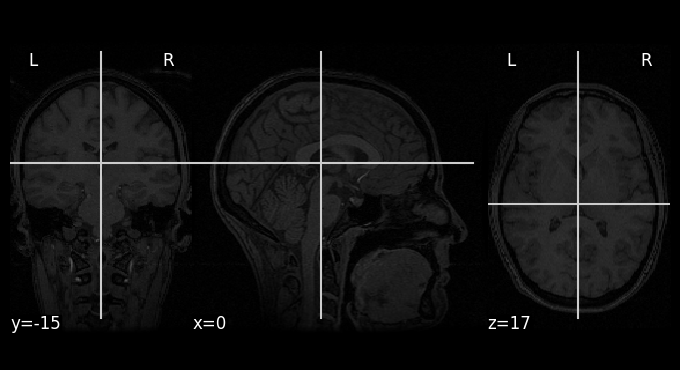

In [ ]:
from nilearn import plotting
plotting.plot_anat(anat_image)  #We plot the anatomical image

In [ ]:
# Now let's inspect a functional image

func_image = load_img(haxby_dataset.func)
print(func_image.header)
func_image.get_data()

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   40   64   64 1452    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   3.5  3.75 3.75 2.5  0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1687.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 

<ipython-input-27-e4e1efec8b5e>:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  func_image.get_data()


array([[[[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  4,  8,  3],
         [ 0,  0,  0, ...,  5, 10,  4],
         ...,
         [ 6,  4,  5, ...,  0,  0,  0],
         [ 3,  2,  1, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  2,  8,  7],
         [ 0,  0,  0, ...,  5,  5,  4],
         ...,
         [ 5,  3,  3, ...,  0,  0,  0],
         [ 3,  2,  1, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  6,  3,  8],
         [ 0,  0,  0, ...,  8,  8,  9],
         ...,
         [ 5,  3,  4, ...,  0,  0,  0],
         [ 2,  1,  1, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        ...,

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 6,  3,  4, ...,  0,  0,  0],
         [ 6,  4,  6, ...,  0,  0,  0],
         ...,
         [ 8, 11, 10, ...,  0,  0,  0],
         [ 6,  9,  9, ...,  0,  0,  0],
    

In [ ]:
func_image.dataobj.shape  #We can see that the image is in 4D (it also includes time), which makes sense since it has been acquired through fMRI

(40, 64, 64, 1452)

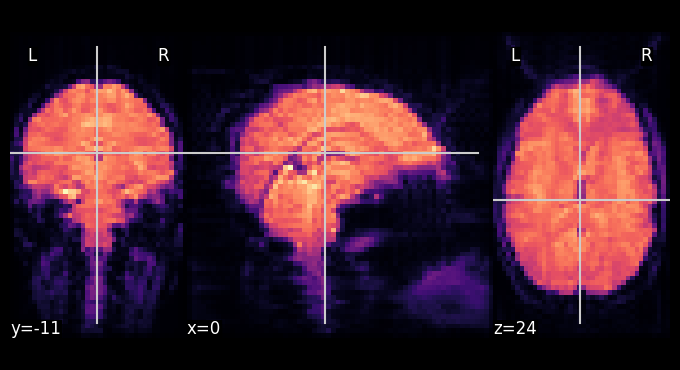

In [ ]:
from nilearn.image import mean_img
func_image_mean = mean_img(func_image)  # Since it's a 4D image we will compute the mean over time and plot it.
plotting.plot_epi(func_image_mean, cmap='magma')

Get the behavioral data (information about how the subject performed the task):

In [ ]:
# Load target information as string and give a numerical identifier to each
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=' ')
conditions = behavioral['labels'].values

# Record these as an array of sessions
sessions = behavioral['chunks'].values
unique_sessions = behavioral['chunks'].unique()

# fMRI data: a unique file for each session
func_filename = haxby_dataset.func[0]

**Exercise 1.2.2** Examine what you've loaded.

In [ ]:
behavioral.head(n=30)

,labels,chunks
0,rest,0
1,rest,0
2,rest,0
3,rest,0
4,rest,0
5,rest,0
6,scissors,0
7,scissors,0
8,scissors,0
9,scissors,0


 The "labels" column from above refers to the categories of stimuli that were presented to the participants during the fMRI scanning (rest, scissors, face, etc).  The "Chunks" column, on the other hand, seems to be refered to different scanning sessions or runs.

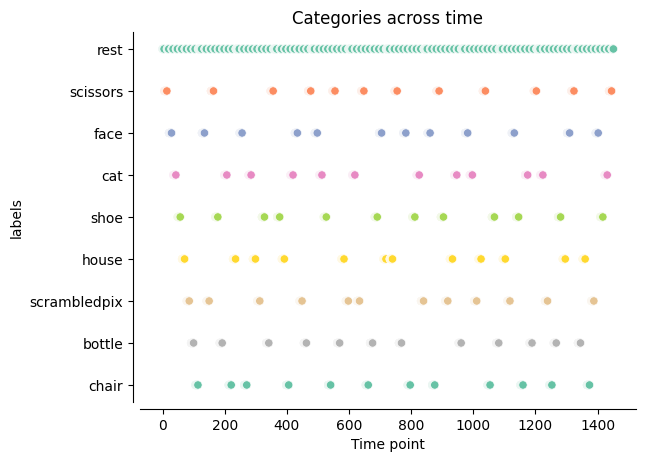

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x=behavioral.index, y=behavioral['labels'],
                     hue=behavioral['labels'], legend=False, palette='Set2')
plt.title('Categories across time')
ax.set_xlabel('Time point')
sns.despine(offset=5)

In [ ]:
#We can count the number of times each stimulus was present in each session (chunk):

# Group by 'chunks' and 'labels', then count the occurrences
stimulus_counts = behavioral.groupby(['chunks', 'labels']).size().reset_index(name='counts')

# Display the counts
print(stimulus_counts)


     chunks        labels  counts
0         0        bottle       9
1         0           cat       9
2         0         chair       9
3         0          face       9
4         0         house       9
..      ...           ...     ...
103      11         house       9
104      11          rest      49
105      11      scissors       9
106      11  scrambledpix       9
107      11          shoe       9

[108 rows x 3 columns]


From the session data, we'll create an *event structure* for each session.

In [ ]:
TR = 2.5 # we need to indicate the Time of Repetition (TR) manually
events = {}
# events will take  the form of a dictionary of Dataframes, one per session
for session in unique_sessions:
    # get the condition label per session
    conditions_session = conditions[sessions == session]
    # get the number of scans per session, then the corresponding
    # vector of frame times
    n_scans = len(conditions_session)
    frame_times = TR * np.arange(n_scans)
    # each event last the full TR
    duration = TR * np.ones(n_scans)
    # Define the events object
    events_ = pd.DataFrame(
        {'onset': frame_times, 'trial_type': conditions_session, 'duration': duration})
    # remove the rest condition and insert into the dictionary
    events[session] = events_[events_.trial_type != 'rest']

**Exercise 1.2.3** Take a look at the new DataFrame. The events can be visualized using the 'plot_event' function.



In [ ]:
events

{0:      onset trial_type  duration
 6     15.0   scissors       2.5
 7     17.5   scissors       2.5
 8     20.0   scissors       2.5
 9     22.5   scissors       2.5
 10    25.0   scissors       2.5
 ..     ...        ...       ...
 110  275.0      chair       2.5
 111  277.5      chair       2.5
 112  280.0      chair       2.5
 113  282.5      chair       2.5
 114  285.0      chair       2.5
 
 [72 rows x 3 columns],
 1:      onset trial_type  duration
 6     15.0       face       2.5
 7     17.5       face       2.5
 8     20.0       face       2.5
 9     22.5       face       2.5
 10    25.0       face       2.5
 ..     ...        ...       ...
 110  275.0      house       2.5
 111  277.5      house       2.5
 112  280.0      house       2.5
 113  282.5      house       2.5
 114  285.0      house       2.5
 
 [72 rows x 3 columns],
 2:      onset trial_type  duration
 6     15.0       face       2.5
 7     17.5       face       2.5
 8     20.0       face       2.5
 9     22.5    

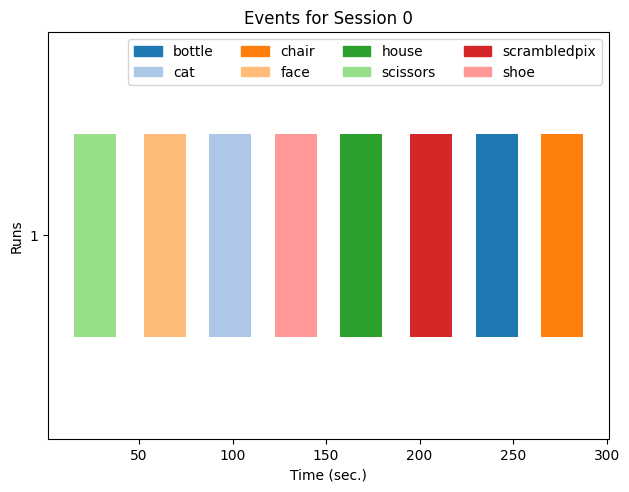

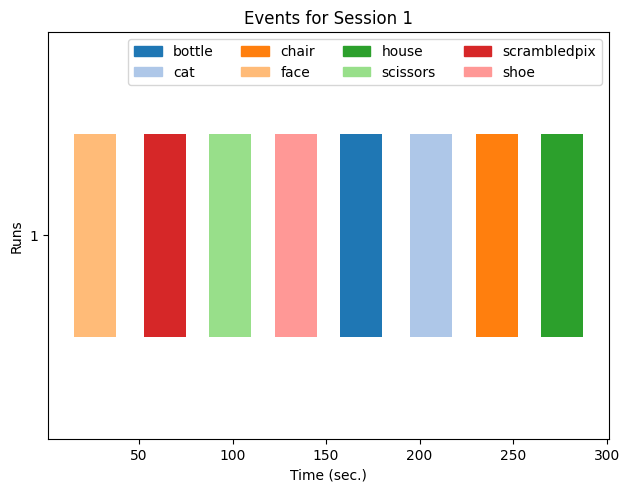

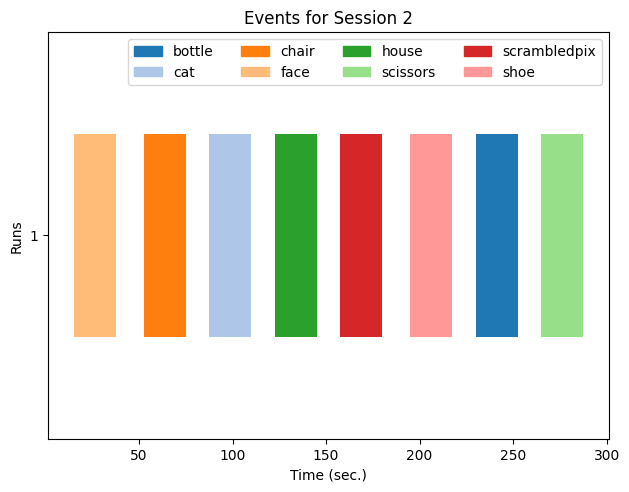

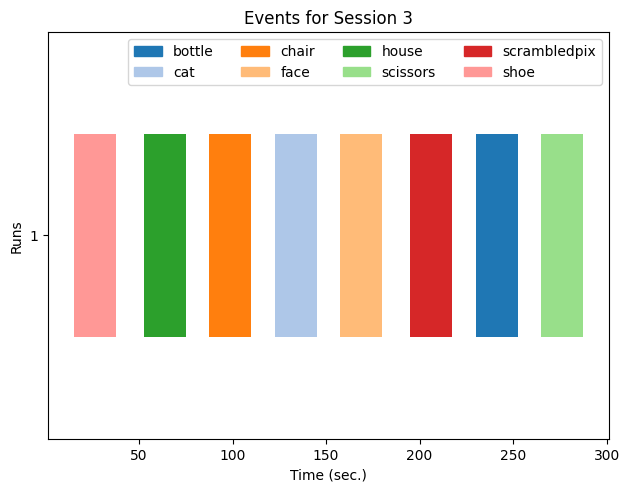

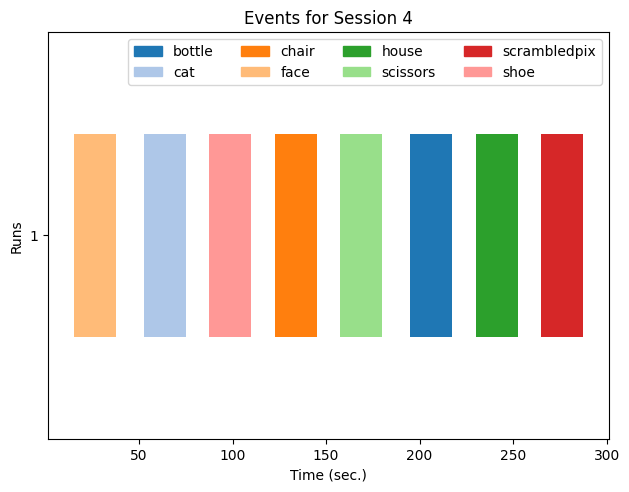

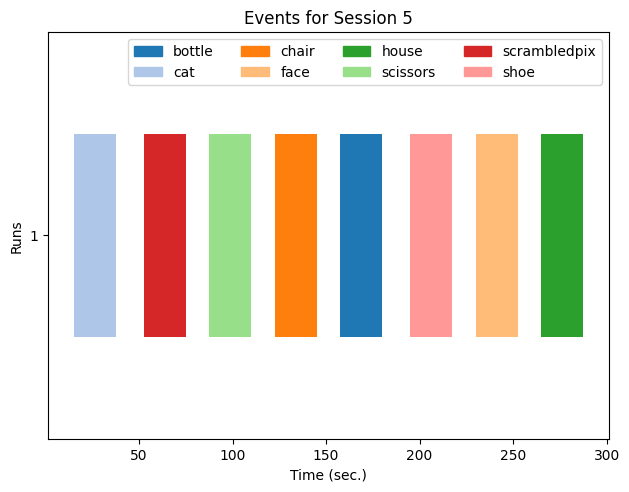

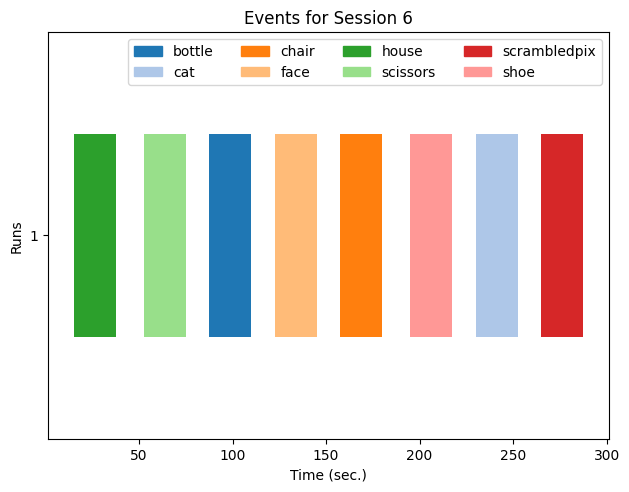

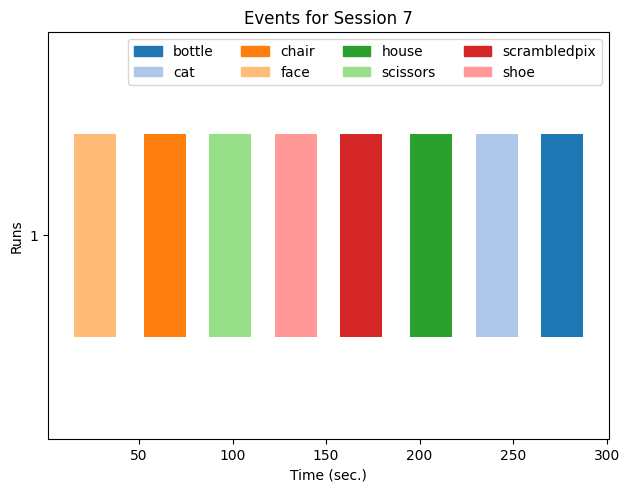

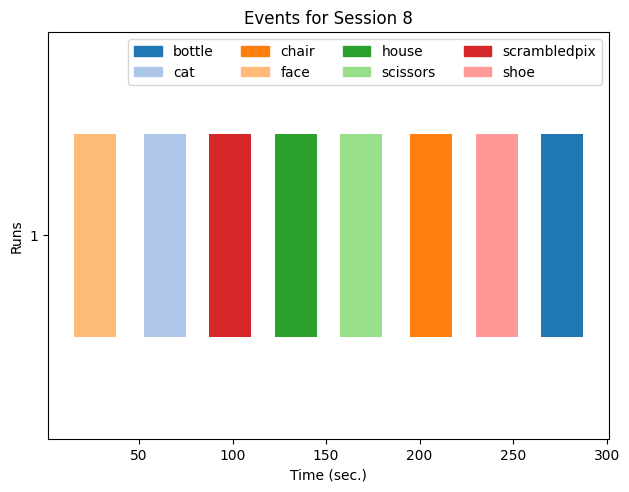

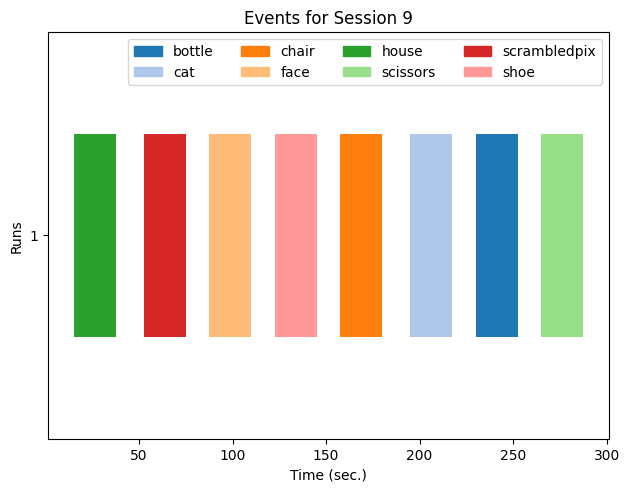

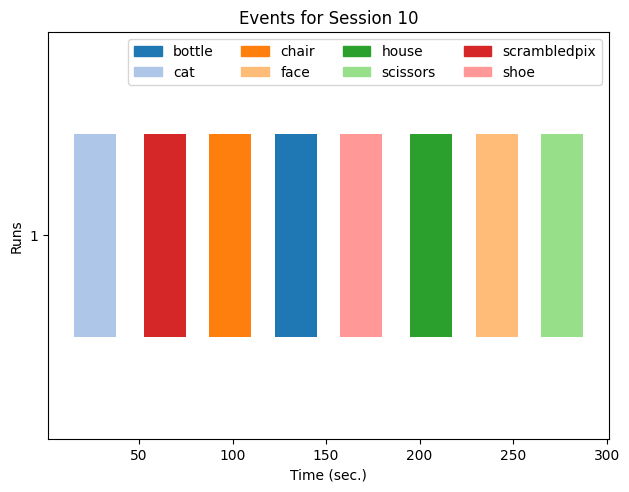

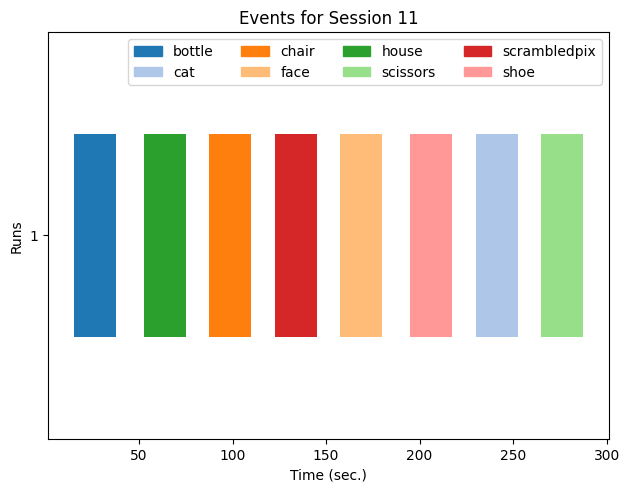

In [ ]:
from nilearn.plotting import plot_event

for session in events:
    plot_event(events[session]) #plot the events for this session
    plt.title(f'Events for Session {session}')
    plt.show()

In the plot we can see the different stimuli and the time each one was presented for each session. This helps to understand the timing and distribution of stimuli during the fMRI sessions.

### 1.3. Define the GLM model and run the analyses.

We'll use tools from nilearn to generate the statistical model.

REMEMBER: A first level model is the statistical comparison between the different *conditions* (or blocks) from a *single subject*.

You can find more information [HERE](https://nilearn.github.io/stable/glm/index.html)

In [ ]:
z_maps = []
conditions_label = []
session_label = []

# Instantiate the glm
from nilearn.glm.first_level import FirstLevelModel
glm = FirstLevelModel(t_r=TR,
                      mask_img=haxby_dataset.mask,
                      high_pass=.008,
                      smoothing_fwhm=4,
                      memory='nilearn_cache')



Before running the GLM massively, let's try to understand it with one example:




In [ ]:
events[session].trial_type.unique()
from nilearn.image import index_img
fmri_session = index_img(func_filename, sessions ==0)
glm.fit(fmri_session, events = events[0])

________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x78f340287fd0>, target_affine=None, target_shape=None, copy=False, interpolation='nearest')
_____________________________________________________resample_img - 0.0s, 0.0min


/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:493: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker._filter_and_mask...
_filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x78f344599210>, <nibabel.nifti1.Nifti1Image object at 0x78f340287fd0>, { 'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'reports': True,
  'runs': None,
  'smoothing_fwhm': 4,
  'standardize': False,
  'standardize_confounds': True,
  't_r': 2.5,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=0, confounds=None, sample_mask=None, copy=True, dtype=None)
__________________________________________________filter_and_mask - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.glm.first_level.first_level.run_glm...
run_glm(array([[-0.114769, ..., -2.149296],
       ...,

FirstLevelModel(high_pass=0.008,
                mask_img='/root/nilearn_data/haxby2001/mask.nii.gz',
                memory=Memory(location=nilearn_cache/joblib), smoothing_fwhm=4,
                t_r=2.5)

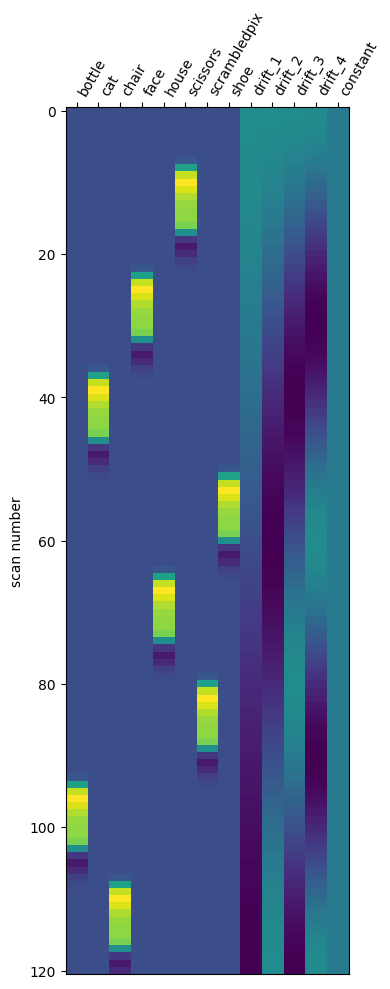

In [ ]:
from nilearn.plotting import plot_design_matrix
design_matrix = glm.design_matrices_[0]
plot_design_matrix(design_matrix)
plt.show()

# Nueva sección

Now, run the GLM on **each** session from the *events* dataframe.  

In [ ]:
# now run the GLM on each session
events[session].trial_type.unique()
from nilearn.image import index_img
for session in unique_sessions:
    # grab the fmri data for that particular session
    fmri_session = index_img(func_filename, sessions == session)

    # fit the glm
    glm.fit(fmri_session, events=events[session])

    # set up contrasts: one per condition
    conditions = events[session].trial_type.unique()
    for condition_ in conditions:
        z_maps.append(glm.compute_contrast(condition_))
        conditions_label.append(condition_)
        session_label.append(session)

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-1.44475 , ...,  0.379275]), <nibabel.nifti1.Nifti1Image object at 0x78f33fb4c250>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.013524, ...,  0.844135]), <nibabel.nifti1.Nifti1Image object at 0x78f33fb4c250>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([ 0.217486, ..., -1.430348]), <nibabel.nifti1.Nifti1Image object at 0x78f33fb4c250>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] C

**Exercise 1.3.1**: Explain what do you interpret from the figure. You can plot other sessions to see the differences.

The design matrix from the GLM analysis in fMRI represents the relationship between different stimuli and brain scans. On the y-axis there is the "scan number", which refers to each individual fMRI scan taken over time. The x-axis, on the other hand, shows different stimuli presented during the experiment.The colored rectangles along the matrix indicate when a particular stimulus was presented relative to the fMRI scans (I interpret that the corresponding stimulus was presented during that scan).

###1.4. Understanding the **contrasts** and generate a report of the results.

We'll use a specific function that generates a summary report of the results of the First Level analysis.

In [ ]:
from nilearn.image import mean_img
from nilearn.reporting import make_glm_report
mean_img_ = mean_img(func_filename)
report = make_glm_report(glm,
                         contrasts=conditions,
                         bg_img=mean_img_,
                         )

report  # This report can be viewed in a notebook

drift_model,cosine
drift_order,1
fir_delays,[0]
high_pass (Hz),0.01
hrf_model,glover
noise_model,ar1
scaling_axis,0
signal_scaling,0
slice_time_ref,0.0
smoothing_fwhm,4
standardize,False


###1.5. A decoding pipeline

This part uses Machine Learning to implement a decoder.  

In [ ]:
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
decoder = Decoder(estimator='svc', mask=haxby_dataset.mask, standardize=False,
                  screening_percentile=5, cv=LeaveOneGroupOut())
decoder.fit(z_maps, conditions_label, groups=session_label)

# Return the corresponding mean prediction accuracy compared to chance

classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
chance_level = 1. / len(np.unique(conditions))
print('Classification accuracy: {:.4f} / Chance level: {}'.format(
    classification_accuracy, chance_level))

/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:493: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


Classification accuracy: 0.7173 / Chance level: 0.125


**Exercise 1.5.1**: examine the inputs and outputs of the decoder and interpret the results.

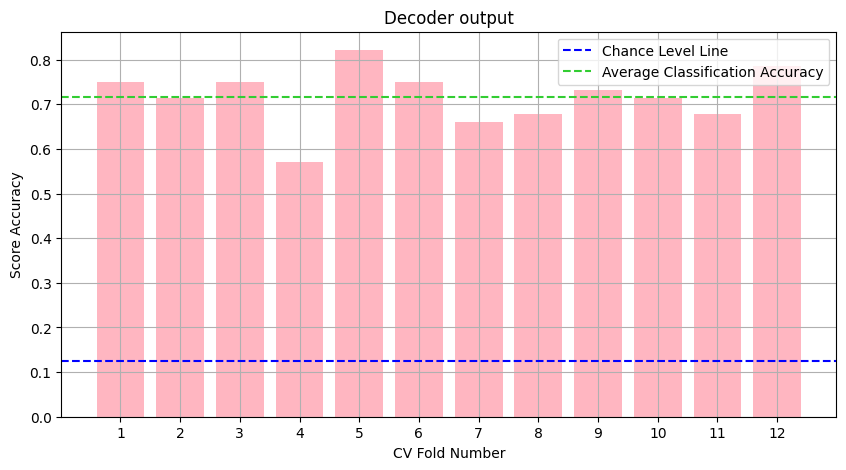

In [ ]:
# Visualizing cross-validation scores
plt.figure(figsize=(10, 5))
cv_scores_array = np.array(list(decoder.cv_scores_.values()))
plt.bar(range(cv_scores_array.shape[1]), cv_scores_array.mean(axis=0), color='lightpink')
plt.axhline(y=chance_level, color='blue', linestyle='dashed', label='Chance Level Line')
plt.axhline(y=classification_accuracy, color='limegreen', linestyle='dashed', label='Average Classification Accuracy')
plt.xticks(range(cv_scores_array.shape[1]), labels=[f'{num}' for num in range(1, cv_scores_array.shape[1] + 1)])
plt.title('Decoder output')
plt.xlabel('CV Fold Number')
plt.ylabel('Score Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


The classification algorithm in fMRI data analysis is used to determine how well different brain activity patterns can predict specific stimuli or conditions. It's a way to assess the relationship between brain responses and different types of stimuli.

I understand that the chance level refers to the accuracy one would expect by random guessing. In this case, having a chance level of 0.125 means that if the classification of stimuli was done randomly, there would be a 12.5% chance of correctly predicting the stimulus type.

Therefore, a classification accuracy significantly higher than the chance level (71.73% vs. 12.5%), suggests that the model is effectively distinguishing between different stimuli types based on brain activity, and it's not just randomly guessing.